## Import things 

In [14]:
import numpy as np

In [15]:
from TFANN import ANNR
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale

In [16]:
import datetime as dt

In [17]:
from datetime import datetime

In [18]:
import numpy as np
import os
import pandas as pd
import urllib.request
     

In [19]:
from IPython.display import clear_output


## Initialisation

In [20]:
# valid period : 300, 900, 1800, 7200, 14400, 86400 :seconds
 
def GetCurDF_5min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_30min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_2Hours(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df


### Initialisation

In [21]:
for coin in ['LSK','ETH','ETC','STR','XMR','XRP','LTC','ATOM','XMR','ZEC','BAT','SNT','BTC']:
    clear_output()

    starting_time_all = 1420070400
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
        df_30min =  [GetCurDF_30min(coin,starting_time_all), '{0}_30min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
        df_2Hour =  [GetCurDF_2Hours(coin,starting_time_all), '{0}_2H_Freq_starting_at_{1}'.format(coin,timestamp_start)]

        
        for tables in [df_5min, df_30min , df_2Hour]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])
                
            elif '_30min_' in tables[1]:
                tables[0].to_csv('Coin_Data_30min/{0}.csv'.format(tables[1]))
                list_30min.append(tables[1])
            else:
                tables[0].to_csv('Coin_Data_2H/{0}.csv'.format(tables[1]))
                list_2H.append(tables[1])
                
        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min, list_30min, list_2H]
        
        
    for li in to_save_list:

        if '_5min_' in li[0]:
            MyFile=open('{0}_5min_Freq.txt'.format(coin),'w')

        elif '_30min_' in li[0]:
            MyFile=open('{0}_30min_Freq.txt'.format(coin),'w')

        else:
            MyFile=open('{0}_2H_Freq.txt'.format(coin),'w')

        for element in li:
            MyFile.write(element)
            MyFile.write('\n')
        MyFile.close()
        

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1420070400&end=1427846400&period=300
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1420070400&end=1427846400&period=1800
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1420070400&end=1427846400&period=7200
BTC 1427846400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1427846400&end=1435622400&period=300
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1427846400&end=1435622400&period=1800
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1427846400&end=1435622400&period=7200
BTC 1435622400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1435622400&end=1443398400&period=300
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1435622400&end=1443398400&period=1800
https://poloniex.com/public?c

In [37]:
def GetAPIUrl(cur, start):
    '''
    Makes a URL for querying historical prices of a cyrpto from Poloniex
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    '''
    start = start
    end = start + 7776000
    return 'https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200'.format(cur, start,end)
 
def GetCurDF(cur,start, fp):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start
    
    openUrl = urllib.request.urlopen(GetAPIUrl(cur,start))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df
 

In [61]:
a =GetCurDF(cur='ETH',start = 1420070400,fp='new')

In [62]:
a['date_time'] = a['date'].apply(lambda x : datetime.fromtimestamp(x))

In [63]:
a

,close,date,high,low,open,quoteVolume,volume,weightedAverage,date_time
0,0,0,0,0,0,0,0,0,1970-01-01


In [35]:
90*24*60*60

7776000

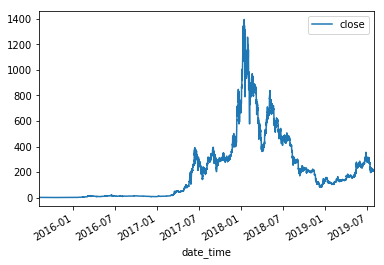

In [9]:
a.set_index('date_time')[['close']].plot()